# Data Collection and Pre-*Processing*

**Data Collection and Pre-Processing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# My data is in google drive.
v_train_dir ="/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/"
v_test_dir="/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set"

In [4]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [5]:
v_train_samples =get_files(v_train_dir)
v_num_classes=len(glob.glob(v_train_dir+"/*"))
v_test_samples=get_files(v_test_dir)
print(v_num_classes,"Classes")
print(v_train_samples,"Train images")
print(v_test_samples,"Test images")

9 Classes
11332 Train images
3416 Test images


In [6]:
# Pre-processing data with parameters.
v_train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
v_test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
v_train_generator=v_train_datagen.flow_from_directory(v_train_dir,target_size=(img_width,img_height),batch_size=batch_size)
v_test_generator=v_test_datagen.flow_from_directory(v_test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 11332 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [8]:
v_train_generator.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

# Model Building

**Model Building**

In [9]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(v_num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

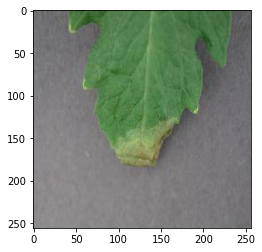

In [10]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img1 = load_img('/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Late_blight/013f987a-9371-4763-a104-ea6f326e584b___GHLB2 Leaf 8556.JPG')
plt.imshow(img1);
#preprocess image
img1 = load_img('/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Late_blight/013f987a-9371-4763-a104-ea6f326e584b___GHLB2 Leaf 8556.JPG', target_size=(256, 256))
img = img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [11]:
validation_generator = v_train_datagen.flow_from_directory(v_train_dir,target_size=(img_height, img_width),batch_size=batch_size)
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
nb_epoch =10
train=model.fit_generator(v_train_generator,epochs=nb_epoch,steps_per_epoch=v_train_generator.samples//batch_size,validation_data=validation_generator,validation_steps=validation_generator.samples // batch_size,verbose=1)


Found 11332 images belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
354/354 [==============================] - 2635s 7s/step - loss: 1.1783 - accuracy: 0.5746 - val_loss: 0.6580 - val_accuracy: 0.7653
Epoch 2/10
354/354 [==============================] - 1614s 5s/step - loss: 0.5768 - accuracy: 0.7919 - val_loss: 0.5398 - val_accuracy: 0.8043
Epoch 3/10
354/354 [==============================] - 1563s 4s/step - loss: 0.4322 - accuracy: 0.8479 - val_loss: 0.3476 - val_accuracy: 0.8742
Epoch 4/10
354/354 [==============================] - 1590s 4s/step - loss: 0.3105 - accuracy: 0.8919 - val_loss: 0.3186 - val_accuracy: 0.8865
Epoch 5/10
354/354 [==============================] - 1524s 4s/step - loss: 0.2846 - accuracy: 0.9008 - val_loss: 0.2469 - val_accuracy: 0.9175
Epoch 6/10
354/354 [==============================] - 1517s 4s/step - loss: 0.2120 - accuracy: 0.9281 - val_loss: 0.1603 - val_accuracy: 0.9462
Epoch 7/10
354/354 [==============================] - 1572s 4s/step - loss: 0.1934 - accuracy: 0.9313 - val_loss: 0.1539 - val_accuracy:

In [12]:
# Save model
from keras.models import load_model
model.save('vegetable.h5')

# IBM Deployment

**IBM Deployment**

In [13]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.4 MB/s 
     |████████████████████████████████| 51 kB 659 kB/s 
     |████████████████████████████████| 824 kB 43.8 MB/s 
     |████████████████████████████████| 133 kB 44.3 MB/s 
     |████████████████████████████████| 547 kB 43.9 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=c7ded0bd279f88f5027d8117cc1de77245ef4149b942954224f4b44b3cd62647
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=67b767c6dc04532d527d5bfbd088ca329f3c2a892bab7427b5afa87441a7980d
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [14]:
from ibm_watson_machine_learning import APIClient

In [15]:
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "oWwMptIWYMhIEjIrCdapePv5oA13N4YrsxfqbO9xC22y"
}

In [16]:
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [17]:
client

In [18]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------------------------------  ------------------------
ID                                    NAME                                          CREATED
cd3c5446-b337-4425-bbca-31ad7f4ec0be  Fertilizers Recommendation System Deployment  2022-11-18T23:19:38.565Z
------------------------------------  --------------------------------------------  ------------------------


In [19]:
space_uid = "cd3c5446-b337-4425-bbca-31ad7f4ec0be"

In [20]:
client.set.default_space(space_uid)

'SUCCESS'

In [21]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [22]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [23]:
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

# Test the Model

**Test the model**

In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
test_dir="/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set"

In [26]:
test_dir

'/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set'

In [27]:
model=load_model('/content/vegetable.h5')


In [28]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
model = tf.keras.models.load_model("/content/vegetable.h5")

In [30]:
test_datagen_1=ImageDataGenerator(rescale=1)
test_generator_1=test_datagen_1.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical'
)

Found 11332 images belonging to 9 classes.


In [31]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
img=load_img('/content/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.JPG')

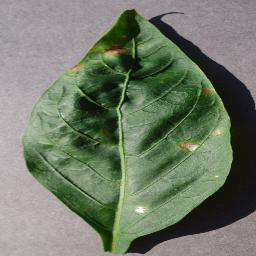

In [33]:
img

In [34]:
x=img_to_array(img)
x=np.expand_dims(x,axis=0)


In [35]:
img=image.load_img(r'/content/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.JPG')
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

index[y[0]]

1/1 [==============================] - 0s 309ms/step


'Pepper,_bell___Bacterial_spot'

In [37]:
model.evaluate(v_test_generator,steps=50)


50/50 [==============================] - 223s 5s/step - loss: 0.0992 - accuracy: 0.9638


[0.09923719614744186, 0.9637500047683716]